In [ ]:
# Install necessary libraries
!pip install diffusers transformers accelerate
!pip install opencv-python nltk
!pip install xformers


In [ ]:
# Import necessary libraries
import torch
from diffusers import StableDiffusionPipeline
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from transformers import AutoTokenizer

In [ ]:
# Load NLTK data for stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Initialize Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
pipe.to("cuda")  # Ensure GPU usage for faster performance

# Preprocess prompt with tokenization and stop word removal
def preprocess_prompt(prompt):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(prompt)
    filtered_prompt = " ".join([w for w in word_tokens if not w.lower() in stop_words])
    return filtered_prompt

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Define the prompt for the e-commerce webpage
raw_prompt = ("a website homepage design which having dark background color for e-commerce purpose which having high quality image")

In [ ]:
# Apply preprocessing
processed_prompt = preprocess_prompt(raw_prompt)

In [ ]:
# Generate the image using the processed prompt
output = pipe(
    processed_prompt,
    num_inference_steps=100,   # Increase steps for quality, adjust as needed
    guidance_scale=10.0        # Higher guidance scale for prompt adherence
).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

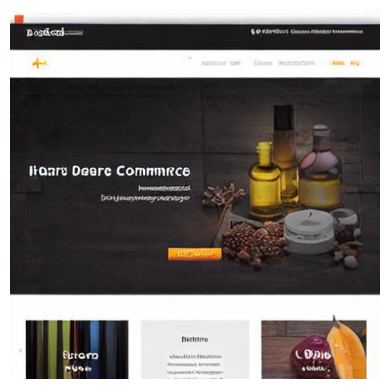

In [ ]:
# Display the generated image
plt.imshow(output)
plt.axis("off")
plt.show()